In [11]:
import sympy as sp

x = sp.Symbol('x')
# Задаем новую функцию f(x) = 3*x - 1
f = 2 * x + 1

# Вычисляем коэффициент b_1 для новой функции
b_1 = (1 / sp.pi) * sp.integrate(f * sp.sin(x), (x, -sp.pi, sp.pi))

# Округлим результат до 3 знаков после запятой
b_1_rounded = b_1.evalf(3)
b_1_rounded

4.00

In [13]:
import numpy as np
import pywt

# Исходный сигнал
signal = np.array([-3,5,-1,-3,2,2,4,-5])

coeffs = pywt.wavedec(signal, 'haar')

coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)
indices_to_zero = np.argsort(np.abs(coeff_arr))[:4]
coeff_arr[indices_to_zero] = 0
coeffs_thresholded = pywt.array_to_coeffs(coeff_arr, coeff_slices, output_format='wavedec')

reconstructed_signal = pywt.waverec(coeffs_thresholded, 'haar')

# Вычисляем L1 норму между исходным и восстановленным сигналами
L1_norm = np.sum(np.abs(signal - reconstructed_signal))

coeffs_thresholded, reconstructed_signal, L1_norm


([array([0.]),
  array([0.]),
  array([3. , 2.5]),
  array([-5.65685425,  0.        ,  0.        ,  6.36396103])],
 array([-2.5 ,  5.5 , -1.5 , -1.5 ,  1.25,  1.25,  3.25, -5.75]),
 np.float64(6.0))

In [12]:
import pywt
import numpy as np

# Исходный сигнал
signal = np.array([9,17,8,10,24,28,21,11])

# Выполняем вейвлет-разложение с использованием вейвлета Хаара
pywt.wavedec(signal, 'haar')

[array([45.254834]),
 array([-14.14213562]),
 array([ 4., 10.]),
 array([-5.65685425, -1.41421356, -2.82842712,  7.07106781])]

In [14]:
from sympy import symbols, integrate, exp, Abs, I, pi

# Определяем переменные
t, w = symbols('t w', real=True)

# Определяем функцию f(t)
f_t = exp(-Abs(t) / 3)

# Определяем преобразование Фурье F(w) = ∫f(t)*exp(-I*w*t) dt от -∞ до ∞
F_w = integrate(f_t * exp(-I * w * t), (t, -float('inf'), float('inf'))).simplify()

# Подставляем w = 1 и округляем до 3 знаков после запятой
F_w_at_1 = F_w.subs(w, 1).evalf(3)
F_w_at_1

0.600

In [16]:
sp.cos(2*sp.pi*3*t) + sp.cos(2*sp.pi*5*t)


cos(6*pi*t) + cos(10*pi*t)

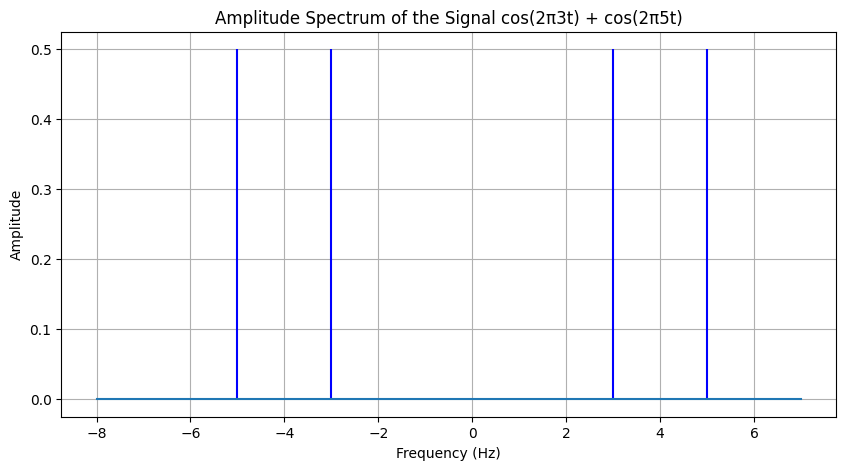

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 16  # sampling frequency in Hz
T = 1    # duration of signal in seconds
t = np.linspace(0, T, fs, endpoint=False)  # time vector

# Signal: x(t) = cos(2 * pi * 3 * t) + cos(2 * pi * 5 * t)
x = np.cos(2 * np.pi * 3 * t) + np.cos(2 * np.pi * 5 * t) + np.cos(2 * np.pi * 13 * t) + np.cos(2 * np.pi * 11 * t)

# Perform Fourier Transform and calculate amplitude spectrum
X_f = np.fft.fft(x)
frequencies = np.fft.fftfreq(len(X_f), 1/fs)
amplitude_spectrum = np.abs(X_f) / len(X_f)

# Plotting the amplitude spectrum (positive frequencies only)
plt.figure(figsize=(10, 5))
plt.stem(frequencies, amplitude_spectrum, 'b', markerfmt=" ", basefmt="-")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Amplitude Spectrum of the Signal cos(2π3t) + cos(2π5t)")
plt.grid()
plt.show()
